In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Prep
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
import category_encoders as ce
from sklearn.model_selection import train_test_split

#Model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

#Evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

#Tunning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Business Problem Understanding

**Context (Background Problem)**

Daegu adalah kota terbesar ketiga di Korea Selatan setelah Seoul dan Busan, dengan populasi sekitar 2,5 juta jiwa. Sebagai kota metropolitan yang padat penduduk namun memiliki keterbatasan lahan, apartemen menjadi solusi utama untuk hunian. Pada tahun 2021, jumlah gedung apartemen di Daegu mencapai sekitar 240 ribu unit, dan sebagian besar transaksi jual beli apartemen dilakukan melalui agen properti.

Namun, harga apartemen sering kali ditentukan secara subjektif oleh pemilik tanpa panduan harga pasar yang jelas. Hal ini memunculkan permasalahan terkait efisiensi proses penjualan apartemen, di mana harga yang ditentukan pemilik tidak selalu mencerminkan harga pasar yang wajar atau optimal. Pemilik yang menetapkan harga terlalu tinggi menyebabkan unit apartemen sulit terjual, sementara harga yang terlalu rendah mengakibatkan potensi keuntungan yang hilang.

Dalam konteks ini, perusahaan real estate menghadapi tantangan untuk memberikan rekomendasi harga yang akurat dan berbasis data kepada pemilik apartemen. Oleh karena itu, penerapan teknologi machine learning menjadi sangat relevan untuk memprediksi harga apartemen berdasarkan berbagai faktor yang dapat mempengaruhi nilai properti, baik faktor internal (misalnya, ukuran apartemen, fasilitas dalam apartemen, tahun pembangunan) maupun eksternal (misalnya, jarak ke stasiun subway, jumlah fasilitas publik di sekitar).

Referensi:

Statista, 2022: Data jumlah apartemen di Daegu (statista.com).

**Problem Statement**

Proses penjualan apartemen di Daegu sering kali tidak efisien karena pemilik menentukan harga secara mandiri tanpa acuan yang akurat terhadap harga pasar. Hal ini menyebabkan:

Harga terlalu tinggi: Unit apartemen menjadi sulit terjual, memperpanjang waktu penjualan.
Harga terlalu rendah: Pemilik kehilangan potensi keuntungan maksimal dari penjualan unit mereka.
Perusahaan membutuhkan model prediksi harga apartemen yang dapat:

Membantu menentukan harga yang lebih tepat sesuai dengan kondisi pasar untuk mempercepat proses penjualan.
Mengidentifikasi faktor-faktor utama yang memengaruhi harga apartemen, baik internal maupun eksternal, untuk memberikan wawasan yang lebih jelas kepada pemilik dalam menentukan harga jual mereka.

**Goals**
Mengembangkan Model Prediksi Harga Apartemen: Membangun model machine learning untuk memprediksi harga apartemen di Daegu dengan memasukkan variabel-variabel penting seperti lokasi, ukuran, fasilitas, tahun pembangunan, dan faktor eksternal seperti jarak ke stasiun subway dan jumlah fasilitas publik di sekitar.
Mengidentifikasi Faktor Utama yang Memengaruhi Harga: Menentukan variabel yang paling berpengaruh terhadap harga apartemen untuk memberikan wawasan yang berguna bagi perusahaan dalam merencanakan strategi investasi dan rekomendasi harga kepada pemilik apartemen.
Evaluasi dan Validasi Model: Memastikan model memiliki performa tinggi dengan menggunakan metrik evaluasi seperti Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), atau R² untuk mengukur akurasi prediksi harga apartemen.

**Analytic Approach**
Eksplorasi Data: Menganalisis pola dan hubungan antara fitur-fitur (misalnya jarak ke stasiun, fasilitas, luas apartemen) dengan harga apartemen. Ini termasuk pembersihan data, mengatasi nilai yang hilang, dan mengidentifikasi outlier.
Modeling: Menggunakan beberapa algoritma untuk memprediksi harga apartemen:
Linear Regression
K-Nearest Neighbors (KNN)
Decision Tree
Random Forest
XGBoost
Proses hyperparameter tuning dilakukan untuk setiap model untuk mendapatkan performa optimal.
Feature Importance Analysis: Menggunakan model seperti Random Forest atau XGBoost untuk menganalisis variabel yang paling signifikan dalam mempengaruhi harga apartemen, dengan tujuan memahami faktor-faktor apa saja yang memberikan dampak terbesar terhadap nilai properti.
Evaluasi Model: Membandingkan performa model-model yang digunakan dengan metrik evaluasi seperti MAE, RMSE, atau R² untuk menentukan model terbaik dalam memprediksi harga apartemen.
Dengan model ini, perusahaan real estate dapat memberikan rekomendasi harga yang lebih akurat dan berbasis data kepada pemilik apartemen, yang pada gilirannya membantu mempercepat penjualan serta memaksimalkan keuntungan yang dapat diperoleh dari transaksi tersebut.


# Data Understanding

* Dataset merupakan data listing Apartement di Daegu, Korea Selatan yang diambil dari laman data.go.kr dari tahun 2007 hingga 2017.
* Setiap baris data merepresentasikan informasi terkait unit apartment.

**Penjelaasan Tiap Kolom**

| Kolom   | Penjeasan|
|----|----|
|Hallway Type| Tipe apartemen berdasarkan desain lorongnya.
|TimeToSubway | Waktu yang diperlukan untuk mencapai stasiun kereta bawah tanah terdekat.
|SubwayStation |  Nama stasiun kereta bawah tanah terdekat.
|N_FacilitiesNearBy(ETC) | Jumlah fasilitas umum di sekitar apartemen.
|N_FacilitiesNearBy(PublicOffice) | Jumlah fasilitas kantor pemerintahan di sekitar apartemen.
|N_SchoolNearBy(University) |  Jumlah universitas yang berada di sekitar apartemen.
|N_Parkinglot(Basement) | Jumlah tempat parkir yang tersedia di basement apartemen.
|YearBuilt | Tahun pembangunan apartemen selesai.
|N_FacilitiesInApt | Jumlah fasilitas yang tersedia di dalam kompleks apartemen.
|Size(sqf) | Luas apartemen dalam satuan kaki persegi.
|SalePrice | Harga apartemen dalam mata uang Won.

In [2]:
df = pd.read_csv('data_daegu_apartment.csv')
df

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
4119,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4121,corridor,5min~10min,Daegu,2.0,5.0,0.0,76.0,1985,3,676,73451


## Melihat Tiipe Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


Data tersebut memiliki 4123 rows daan 11 kolom dengan memiliki beberapa tipe data,di antaranya
4 data bertipe float
4 data bertipe integer
3 data berttipe object

## Missing Values

In [4]:
#missing values

df.isnull().sum()


HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

<Axes: >

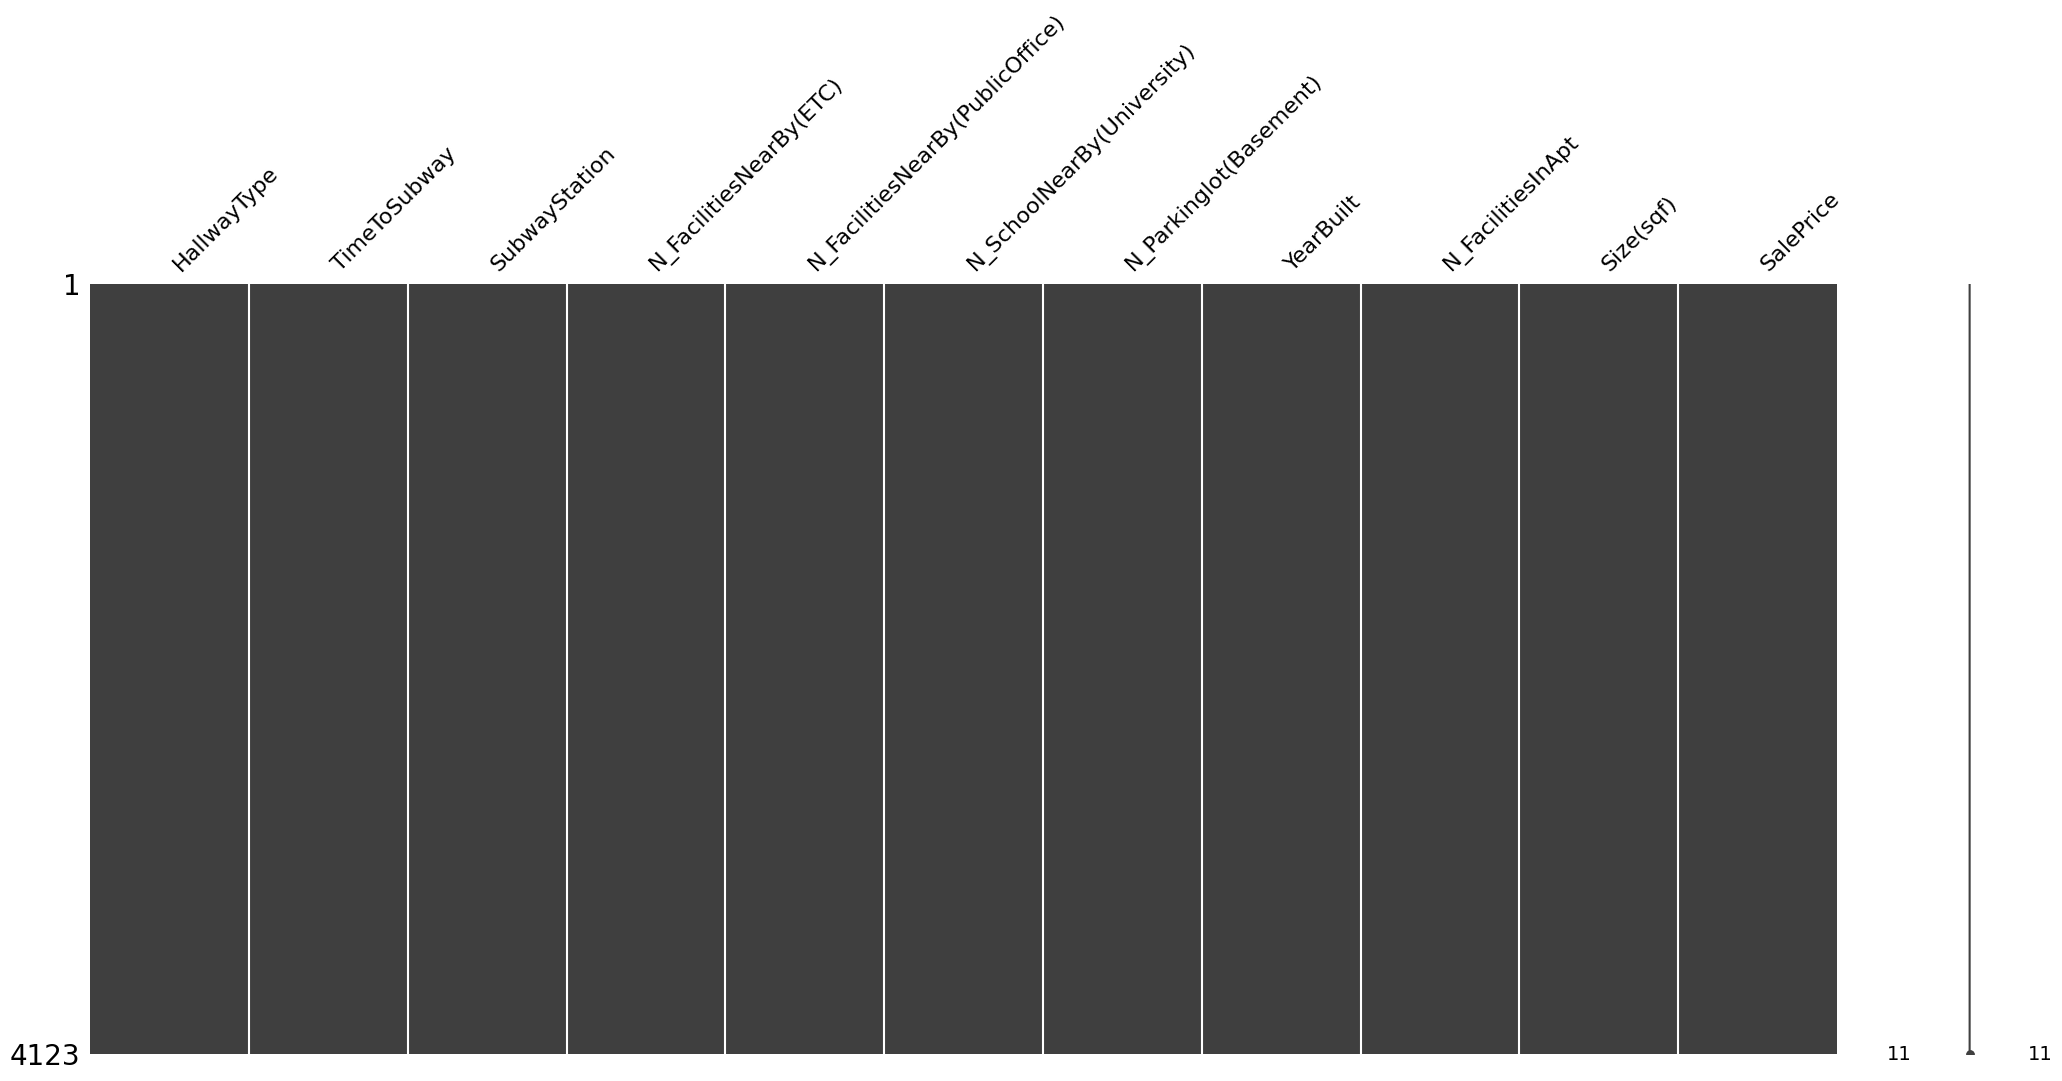

In [5]:
import missingno

# Hubungan antar missing values secara visualisasi
missingno.matrix(df)

Tidak terdapat missing values pada data tersebut

## Data Duplicat

In [6]:
# jumlah yang duplikat
df.duplicated().sum()


np.int64(1422)

In [7]:
print(f'Jumlah data duplikat pada dataset "Daegu Apartment" adalah: {df.duplicated().sum()} baris\n')
display(df[df.duplicated()])

Jumlah data duplikat pada dataset "Daegu Apartment" adalah: 1422 baris



,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
55,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
56,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,371681
122,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,644,149274
127,terraced,0-5min,Banwoldang,0.0,2.0,2.0,524.0,2007,4,1394,256637
133,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,644,168141
...,...,...,...,...,...,...,...,...,...,...,...
4113,terraced,5min~10min,Daegu,0.0,3.0,2.0,400.0,2015,7,644,300884
4114,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,86725
4115,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141


Dataset Daegu Apartments memiliki 1422 baris data duplikat, jadi diputuskan untuk mendrop data yang duplikat tersebut dan hanya mempertahankan data pertama saja pada proses data cleaninng

## Variable Numerik

###  Statistika Deskriptif

In [8]:
df.describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,1.930876,4.135338,2.746301,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,2.198832,1.802640,1.496610,410.372742,8.905768,2.340507,383.805648,106739.839945
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1149.000000,291150.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


### Melihat Data Yang bernilai 0

In [9]:
# Menemukan semua kolom yang memiliki nilai 0
columns_with_zero = df.columns[(df == 0).any()]

# Membuat DataFrame baru yang hanya berisi kolom-kolom dengan nilai 0
zero_df = df[columns_with_zero]

# Menampilkan DataFrame
zero_df

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement)
0,0.0,3.0,2.0,1270.0
1,1.0,5.0,1.0,0.0
2,1.0,7.0,3.0,56.0
3,5.0,5.0,4.0,798.0
4,0.0,1.0,2.0,536.0
...,...,...,...,...
4118,0.0,3.0,2.0,475.0
4119,5.0,6.0,5.0,536.0
4120,5.0,6.0,5.0,536.0
4121,2.0,5.0,0.0,76.0


In [10]:
# Menemukan semua kolom yang memiliki nilai 0
columns_with_zero = df.columns[(df == 0).any()]

# Menghitung jumlah data dengan nilai 0 untuk setiap kolom
zero_counts = (df[columns_with_zero] == 0).sum()

# Menampilkan hasil
zero_counts

N_FacilitiesNearBy(ETC)             1828
N_FacilitiesNearBy(PublicOffice)      46
N_SchoolNearBy(University)            97
N_Parkinglot(Basement)               493
dtype: int64

In [11]:
df[df['N_Parkinglot(Basement)'] == 0]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
10,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,1131,211504
45,corridor,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,0.0,1978,3,903,123008
53,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,77876
64,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,640,126548
...,...,...,...,...,...,...,...,...,...,...,...
4086,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,37168
4099,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,1131,176991
4100,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,1131,163716
4109,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,42477


In [12]:
df[(df['N_Parkinglot(Basement)'] == 0) & (df['YearBuilt'] <2000)]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
10,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,1131,211504
45,corridor,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,0.0,1978,3,903,123008
53,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,77876
64,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,640,126548
...,...,...,...,...,...,...,...,...,...,...,...
4086,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,37168
4099,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,1131,176991
4100,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,1131,163716
4109,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,42477


Nilai 0 pada beberapa kolom dari data tersebut menunjukan bahawa ketidaktersediaan fasilitas pada setiap kolom tersebut, seperti Public Office, Parking Lot, University, dll.

### Distriibusi Data

#### Grafik Histogram

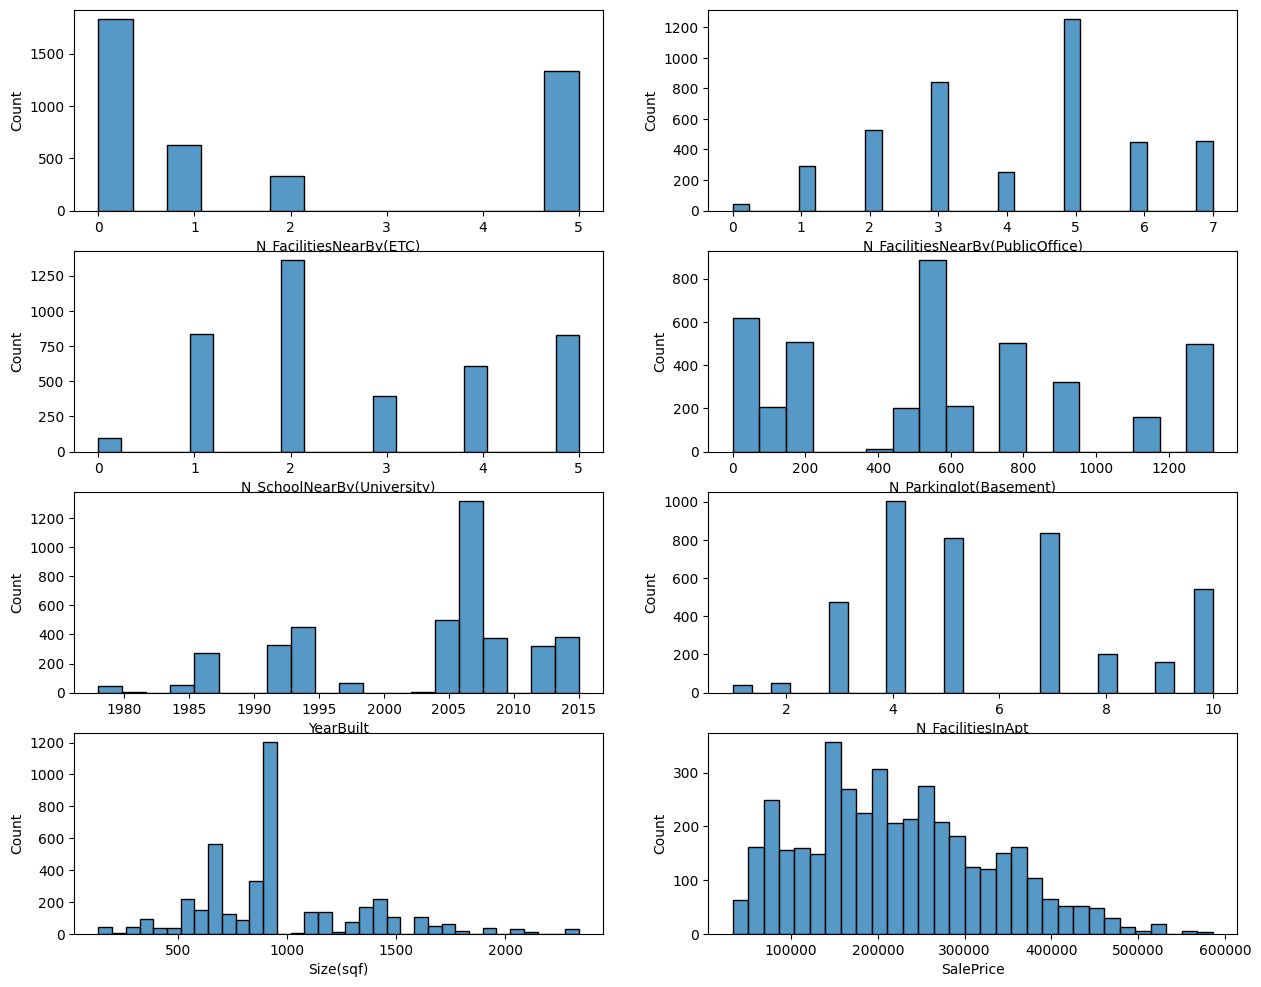

In [13]:
# ambil kolom yang numerik
numerik = df.select_dtypes(include = 'number') # float dan int

plt.figure(figsize = (15,12)) # (kolom, bairs)
posisi = 1
for kolom in numerik.columns:
    plt.subplot(4, 2, posisi) # (baris, kolom, posisi)
    sns.histplot(df[kolom])
    posisi += 1

# mengeprint grafik
plt.show()

#### Uji Normalitas

In [14]:
# Shapiro Wilk
from scipy.stats import shapiro

stat, pval = shapiro(df[kolom])
if pval < 0.05:
    print('Distribusi tidak normal (Tolak H0)')
else:
    print('Distribusi normal (Terima H0)')

Distribusi tidak normal (Tolak H0)


In [15]:
from scipy.stats import kstest

for kolom in numerik.columns:
    stat, pval = kstest(df[kolom],'norm')
    if pval < 0.05:
        print(f'Distribusi {kolom} tidak normal (Tolak H0)')
    else:
        print(f'Distribusi {kolom} normal (Terima H0)')

Distribusi N_FacilitiesNearBy(ETC) tidak normal (Tolak H0)
Distribusi N_FacilitiesNearBy(PublicOffice) tidak normal (Tolak H0)
Distribusi N_SchoolNearBy(University) tidak normal (Tolak H0)
Distribusi N_Parkinglot(Basement) tidak normal (Tolak H0)
Distribusi YearBuilt tidak normal (Tolak H0)
Distribusi N_FacilitiesInApt tidak normal (Tolak H0)
Distribusi Size(sqf) tidak normal (Tolak H0)
Distribusi SalePrice tidak normal (Tolak H0)


Dari Hasil Uji Statistik dan grafik histogramnya,Dapat di simpulkan bahwa Distribusi Data tersebu Tidak Normal

## Outliers

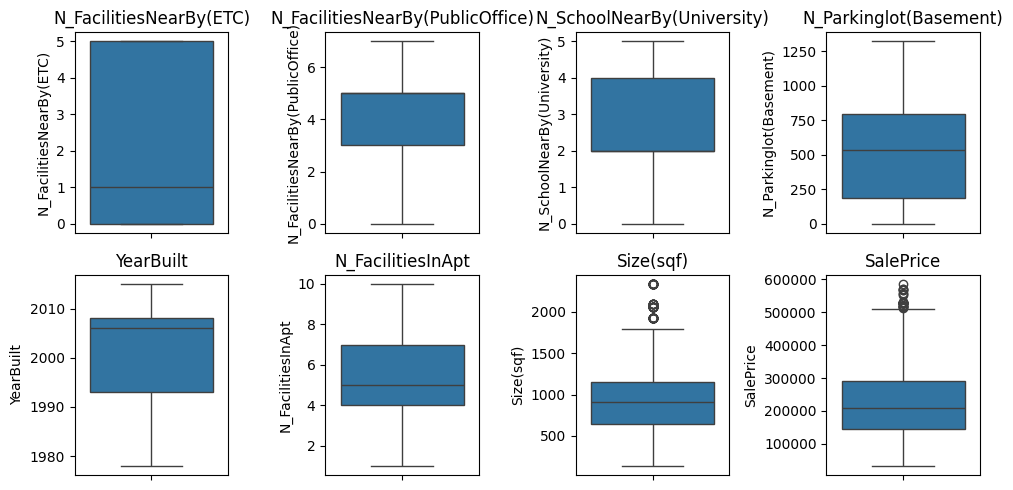

In [16]:

# Calculate the number of rows and columns for the subplot grid
num_cols = numerik.shape[1]
num_rows = int(np.ceil(num_cols / 4))  # Adjust 4 to the desired number of columns per row

# Create box plots for all numeric columns
plt.figure(figsize=(10, 5))  # Adjust figure size as needed
for i, col in enumerate(numerik.columns):
    # Check if the column contains valid data before plotting
    if not df[col].isnull().all() and not all(np.isnan(x) for x in df[col]): #Check for all Null and all NaN
        plt.subplot(num_rows, 4, i + 1)  # Use calculated num_rows and 4 columns per row
        sns.boxplot(y=df[col])
        plt.title(col)
        plt.tight_layout()  # Adjust spacing between subplots

plt.show()

In [17]:
list_jumlah_outliers = []
for kolom in numerik.columns:
    q3 = numerik.describe().loc['75%', kolom]
    q1 = numerik.describe().loc['25%', kolom]
    iqr = q3 - q1
    whis = 1.5 * iqr
    batas_atas = q3 + whis
    batas_bawah = q1 - whis

    # jumlah outliers
    jumlah_outliers = len(df[(df[kolom]>batas_atas) | (df[kolom]<batas_bawah)])
    list_jumlah_outliers.append(jumlah_outliers)

pd.DataFrame({
                'kolom': numerik.columns,
                'jumlah_outliers': list_jumlah_outliers
})

,kolom,jumlah_outliers
0,N_FacilitiesNearBy(ETC),0
1,N_FacilitiesNearBy(PublicOffice),0
2,N_SchoolNearBy(University),0
3,N_Parkinglot(Basement),0
4,YearBuilt,0
5,N_FacilitiesInApt,0
6,Size(sqf),98
7,SalePrice,27


Terdapat Beberapa outliers pada beberapa kolom ,yaitu pada kolom Size(sqf) dan kolom Sale Price, sebelum menghandle outliers tersebut perlu adanya identifikasi untuk memutuskan bagaimana menangai outliers tersebut

**Melihat outliers pada kolom Size(sqf) yang lebih dari 2300**

In [18]:
df[df['Size(sqf)'] > 2300]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
106,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,2337,243362
493,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,2337,190265
546,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,2337,194690
672,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,2337,194690
957,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,2337,314159
1009,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,2337,269911
1146,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,2337,212389
1150,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,2337,283185
1408,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,2337,280973
1676,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,2337,201327


In [19]:
df['N_FacilitiesInApt'].value_counts()

N_FacilitiesInApt
4     1001
7      838
5      810
10     544
3      477
8      203
9      159
2       50
1       41
Name: count, dtype: int64

In [20]:
df['N_Parkinglot(Basement)'].value_counts()

N_Parkinglot(Basement)
536.0     664
798.0     502
0.0       493
1270.0    420
930.0     322
524.0     220
203.0     217
605.0     213
475.0     203
1174.0    159
184.0     139
181.0     108
79.0      104
1321.0     78
56.0       74
76.0       51
18.0       51
108.0      50
218.0      41
400.0      14
Name: count, dtype: int64

In [21]:
df[(df['N_FacilitiesInApt'] > 5) & (df['N_Parkinglot(Basement)'] >536.0)]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
7,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,572,143362
11,terraced,0-5min,Myung-duk,5.0,7.0,5.0,1174.0,2014,9,843,305309
12,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,572,145132
...,...,...,...,...,...,...,...,...,...,...,...
4087,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,527433
4088,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,644,149274
4093,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,161061
4111,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,137168


Otliers yang terdapat pada kolom size yang di atas dari 2300 tidak masuk akal jika hanya memiliki 4 N_FacilitiesInApt dan hanya 536.0 N_Parkinglot(Basement),karena masih banyak lagi apartment yang size nya di bawah 2300 namun memiliki N_FacilitiesInApt dan N_Parkinglot(Basement) yang lebih banyak

In [22]:
df[df['SalePrice'] > 450000]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
42,terraced,0-5min,Banwoldang,0.0,4.0,1.0,605.0,2007,5,1690,476106
97,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1643,495575
104,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1643,469026
114,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,1252,460176
178,terraced,0-5min,Banwoldang,0.0,4.0,1.0,605.0,2007,5,1690,462831
...,...,...,...,...,...,...,...,...,...,...,...
3868,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,529203
3939,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1643,513274
3949,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,556637
3966,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1643,529203


In [23]:
#Mengurutkan hasil value_counts berdasarkan nilai (frekuensi)
df['Size(sqf)'].value_counts().sort_index(ascending=True)

Size(sqf)
135     19
138      2
156     16
160      1
163      1
        ..
1796    15
1928    34
2056    27
2092     8
2337    29
Name: count, Length: 89, dtype: int64

In [24]:
df[(df['Size(sqf)'] >= 1928) & (df['SalePrice'] <450000)]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
106,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,2337,243362
134,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,2056,424778
207,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,348283
288,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,2092,300884
493,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,2337,190265
...,...,...,...,...,...,...,...,...,...,...,...
3901,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,2337,292035
3916,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,2092,407079
3977,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,383716
4027,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,2337,193805


jika di lihat darikorelasinya, yang memiliki korelasi degan sale price/ harga adalah size(sqf),kemungkinan semakin tingginya size maka semakin tinggi juga sale pricenya,namun ada beberapa data juga yang sizenya besar namun salepricenya tidak terlalu tinggiatau di bawah 450000 tetaoi apartment tersebut di bangun di tahun yang lebih tua,sehingga saya lebih memilih mempertahankan outliers tersebut karena mkemungkinan faktor yang mempengaruhi harga tidak hanya dari ukuranya saja bisa jadi karena faktor di bangunnya

## Korelasi

<Axes: >

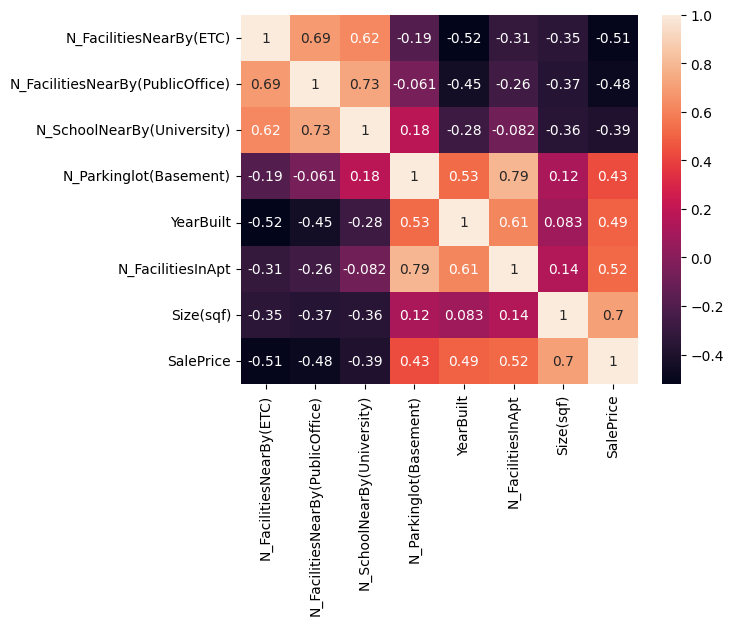

In [25]:
sns.heatmap(numerik.corr(method = 'spearman'), annot = True)

## Variable Kategorik

### Discribe

In [26]:
df.describe(exclude = 'number')

,HallwayType,TimeToSubway,SubwayStation
count,4123,4123,4123
unique,3,5,8
top,terraced,0-5min,Kyungbuk_uni_hospital
freq,2528,1953,1152


### Value Count

In [27]:
df['HallwayType'].value_counts()

HallwayType
terraced    2528
mixed       1131
corridor     464
Name: count, dtype: int64

In [28]:
df['TimeToSubway'].value_counts()

TimeToSubway
0-5min                1953
5min~10min             787
15min~20min            629
10min~15min            583
no_bus_stop_nearby     171
Name: count, dtype: int64

In [29]:
df['SubwayStation'].value_counts()

SubwayStation
Kyungbuk_uni_hospital    1152
Myung-duk                1044
Banwoldang                529
Bangoge                   502
Sin-nam                   467
no_subway_nearby          290
Chil-sung-market           74
Daegu                      65
Name: count, dtype: int64

### Nunique

In [30]:
df.select_dtypes(include = 'object').nunique()

HallwayType      3
TimeToSubway     5
SubwayStation    8
dtype: int64

# Data Cleaning

## Menghapus data duplikat

In [31]:
df.drop_duplicates(inplace = True)

In [32]:
# Menghitung jumlah data duplikat setelah dihapus
df.duplicated().sum()



np.int64(0)

In [33]:
df

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
4116,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,818,290265
4117,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,345132
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
4119,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477


## Menghapus Outliers

### Menghapus outliers pada data kolom size(sqf) > 2300

In [34]:
df.drop(df[df['Size(sqf)'] > 2300].index, inplace = True)

In [35]:
# Menghitung jumlah outlier setelah penghapusan
jumlah_outlier_setelah = df[df['Size(sqf)'] > 2300].shape[0]
print(f"Jumlah outlier Pada kolom Size(sqf) setelah dihapus: {jumlah_outlier_setelah}")

Jumlah outlier Pada kolom Size(sqf) setelah dihapus: 0


## Membuat Data Lebih Konsisten

In [36]:
# Mengganti ~ dengan - di kolom 'TimeToSubway'
df['TimeToSubway'] = df['TimeToSubway'].str.replace('~', '-')

# Mengganti _ dengan - di kolom 'SubwayStation'
df['SubwayStation'] = df['SubwayStation'].str.replace('-', '_')

# Data Preparation

## Splitting

**Train and Test Splitting**

Membagi data training dan testing dengan proporsi 80:20 berarti membagi data menjadi dua bagian, 80% untuk data training dan 20% untuk data testing. Data training digunakan untuk mentrain model, sedangkan data testing digunakan untuk menguji performa model yang telah dilatih.

In [37]:
X = df.drop('SalePrice', axis=1)  # Variabel independen
y = df['SalePrice']              # Variabel target

# split data
X_train, X_test, y_train, y_test = train_test_split(
                    X, # data fitur yang akan displit
                    y, # data variabel target yg akan displit
                    test_size = 0.2, # proporsi pemisahan train dan test -> 80 : 20
                    random_state = 2024, # JANGAN SAMPAI LUPA agar konsisten di setiap kita run
)

In [38]:
y_train.value_counts()/len(y_train)

SalePrice
265486    0.007940
230088    0.007940
203539    0.007473
247787    0.007473
371681    0.007006
            ...   
35398     0.000467
96017     0.000467
356778    0.000467
160637    0.000467
76106     0.000467
Name: count, Length: 764, dtype: float64

In [39]:
y_test.value_counts()/len(y_test)

SalePrice
252212    0.011194
170796    0.009328
300884    0.009328
181415    0.009328
234513    0.009328
            ...   
338938    0.001866
242477    0.001866
73893     0.001866
263716    0.001866
362831    0.001866
Name: count, Length: 336, dtype: float64

## Encoding
**Encoding** adalah proses mengubah data dari format tertentu menjadi format lain, umumnya pada data kategorikal agar bisa digunakan dalam model. Dalam dataset ini, ada beberapa fitur yang berisi data kategorikal, sehingga perlu dilakukan encoding untuk mengubahnya menjadi format numerik. Berikut adalah fitur yang akan diencoding:

**HallwayType**: Fitur ini menggunakan One-Hot Encoding karena memiliki tiga kategori.

**SubwayStation**: Fitur ini menggunakan Binary Encoding karena terdiri dari delapan kategori.

**TimeToSubway**: Fitur ini menggunakan Ordinal Encoding karena waktu dapat diurutkan dari yang terjauh (jauh dari stasiun) hingga yang terdekat (dekat dengan stasiun).

Scaling yang akan digunakan untuk pemodelan adalah Robust Scaler
Robust Scaler adalah metode scaling data yang menggunakan median dan interquartile range (IQR) untuk mengubah skala fitur. Metode ini dirancang agar lebih tahan terhadap outlier dibandingkan scaler lain seperti Standard Scaler atau MinMaxScaler.

Mengapa Menggunakan Robust Scaler?

Tahan terhadap outlier: Median dan IQR tidak dipengaruhi oleh nilai ekstrem.

Cocok untuk data tidak normal: Ideal untuk data dengan distribusi skewed.

Stabilkan performa model: Mengurangi pengaruh outlier sehingga hasil model lebih akurat.

Efisien: Tidak memerlukan transformasi tambahan sebelum scaling.

Kesimpulan: Robust Scaler digunakan jika data memiliki distribusi tidak normal atau terdapat outlier, sehingga menghasilkan data yang lebih seragam tanpa kehilangan informasi penting.

In [40]:
ordinal_mapping = [
    {'col':'TimeToSubway',
     'mapping':{'no_bus_stop_nearby':0, '15min-20min':1, '10min-15min':2, '5min-10min':3, '0-5min':4 }}
    ]

ordinal_encoder = ce.OrdinalEncoder(cols=['TimeToSubway'], mapping=ordinal_mapping)


In [41]:
prep = ColumnTransformer([
    # one hot encoder
    ('one hot encoder', OneHotEncoder(drop = 'first'), ["HallwayType"]),

    # Binary
    ("binary", ce.BinaryEncoder(), ["SubwayStation"]),

    # Ordinal Encoder
    ('ordinal_encoder', ce.OrdinalEncoder(), ['TimeToSubway']),

    # min max scaler
    ('robust scaler', RobustScaler(), list(X.select_dtypes(include = "number").columns))
  ], remainder = 'passthrough') # yg tidak dipanggil diatas juga tetap dipanggil
prep

ColumnTransformer(remainder='passthrough',
                  transformers=[('one hot encoder', OneHotEncoder(drop='first'),
                                 ['HallwayType']),
                                ('binary', BinaryEncoder(), ['SubwayStation']),
                                ('ordinal_encoder', OrdinalEncoder(),
                                 ['TimeToSubway']),
                                ('robust scaler', RobustScaler(),
                                 ['N_FacilitiesNearBy(ETC)',
                                  'N_FacilitiesNearBy(PublicOffice)',
                                  'N_SchoolNearBy(University)',
                                  'N_Parkinglot(Basement)', 'YearBuilt',
                                  'N_FacilitiesInApt', 'Size(sqf)'])])

# Modelling

## Rule based (Non ML)

In [42]:
# Menghitung rata-rata harga aktual
mean_price = df['SalePrice'].mean()

# Fungsi rule-based
def rule_based(row):
    price = mean_price

    # Aturan berdasarkan fasilitas di sekitar (ETC, Public Office)
    if row['N_FacilitiesNearBy(ETC)'] > 2:
        price += 50000
    if row['N_FacilitiesNearBy(PublicOffice)'] > 3:
        price += 30000

    # Aturan berdasarkan kedekatan universitas
    if row['N_SchoolNearBy(University)'] > 3:
        price += 40000

    # Aturan berdasarkan tahun pembangunan (lebih baru cenderung lebih mahal)
    if row['YearBuilt'] >= 2010:
        price += 50000

    # Aturan berdasarkan fasilitas di dalam apartemen
    if row['N_FacilitiesInApt'] >= 7:
        price += 60000

    # Aturan berdasarkan ukuran apartemen
    if row['Size(sqf)'] > 1000:
        price += 70000

    return price

# Menghitung prediksi untuk seluruh dataset
df['Predicted_SalePrice'] = df.apply(rule_based, axis=1)

# Menghitung RMSE, MAE, dan MAPE
rmse = np.sqrt(mean_squared_error(df['SalePrice'], df['Predicted_SalePrice']))
mae = mean_absolute_error(df['SalePrice'], df['Predicted_SalePrice'])

# Membuat DataFrame untuk menyimpan hasil
df0 = pd.DataFrame({
    'model': ['Rule Based'],
    'rmse': [rmse],
    'mae': [mae],
})

# Tampilkan hasil
df0

,model,rmse,mae
0,Rule Based,148737.431599,120010.543682


## Experimen 1 : Model Dasar

In [43]:
# Menentukan Algoritma Model yang Akan Digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

In [44]:
# Model dictionary
models = {
    'Linear Regression': lr,
    'Decision Tree': dt,
    'K-Nearest Neighbors': knn,
    'Random Forest': rf,
    'XGBoost': xgb
}

# Menyiapkan list untuk hasil
results = []

for model_name, model in models.items():
    print(f'Model: {model_name} sedang diproses...')

    # Membuat pipeline
    pipeline = Pipeline(steps=[
        ('prep', prep),
        ('model', model)
    ])

    # Cross-validation
    cv = KFold(n_splits=5, shuffle=True, random_state=42)

    # RMSE dan MAE dengan custom scoring
    rmse_scores = -1 * cross_val_score(
        pipeline,
        X_train,
        y_train,
        cv=cv,
        scoring='neg_root_mean_squared_error'
    )
    mae_scores = -1 * cross_val_score(
        pipeline,
        X_train,
        y_train,
        cv=cv,
        scoring='neg_mean_absolute_error'
    )

    # Menyimpan hasil
    results.append({
        'Model': model_name,
        'Mean RMSE': np.mean(rmse_scores),
        'Std RMSE': np.std(rmse_scores),
        'Mean MAE': np.mean(mae_scores),
        'Std MAE': np.std(mae_scores)
    })

# Membuat DataFrame hasil
result_df = pd.DataFrame(results)
result_df

Model: Linear Regression sedang diproses...
Model: Decision Tree sedang diproses...
Model: K-Nearest Neighbors sedang diproses...
Model: Random Forest sedang diproses...
Model: XGBoost sedang diproses...


,Model,Mean RMSE,Std RMSE,Mean MAE,Std MAE
0,Linear Regression,51684.415823,659.144108,42341.818090,878.983866
1,Decision Tree,46743.158340,901.788524,37559.221301,737.472544
2,K-Nearest Neighbors,50505.783798,1163.190715,40080.212107,663.845470
3,Random Forest,46701.607262,904.817508,37546.226476,679.889007
4,XGBoost,46642.345901,1034.006555,37491.392283,827.242821


Berdasarkan tabel, Random Forest Regressor, XGBoost Regressor, dan Decision Tree Regressor memiliki mean RMSE dan mean MAE yang terendah. Ketiga model ini juga memiliki standar deviasi yang kecil, yang menunjukkan bahwa hasil prediksi mereka relatif konsisten.

Oleh karena itu, di antara lima model yang dibandingkan, Random Forest Regressor, XGBoost Regressor, dan Decision Tree Regressor dapat dianggap sebagai model terbaikpada experiment pertama.

## Experiment 2: 3 Model terbaik dengan menghapus outliers menggunakan IQR

In [45]:
# Mengambil hanya numerik saja
numerik = X_train.select_dtypes(include='number')

# Menghitung Q1, Q3, dan IQR
Q1 = numerik.quantile(0.25)
Q3 = numerik.quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus outliers
mask = (numerik >= lower_bound) & (numerik <= upper_bound)
mask = mask.all(axis=1)  # Mengambil baris yang tidak memiliki outlier di semua kolom

# Menghapus outliers dari X_train
X_train_iqr = X_train[mask]

# Jika Anda juga ingin menghapus y_train yang sesuai
y_train_iqr = y_train[mask]

# Menampilkan hasil
print("Jumlah baris sebelum penghapusan outlier:", X_train.shape[0])
print("Jumlah baris setelah penghapusan outlier:", X_train_iqr.shape[0])

Jumlah baris sebelum penghapusan outlier: 2141
Jumlah baris setelah penghapusan outlier: 2079


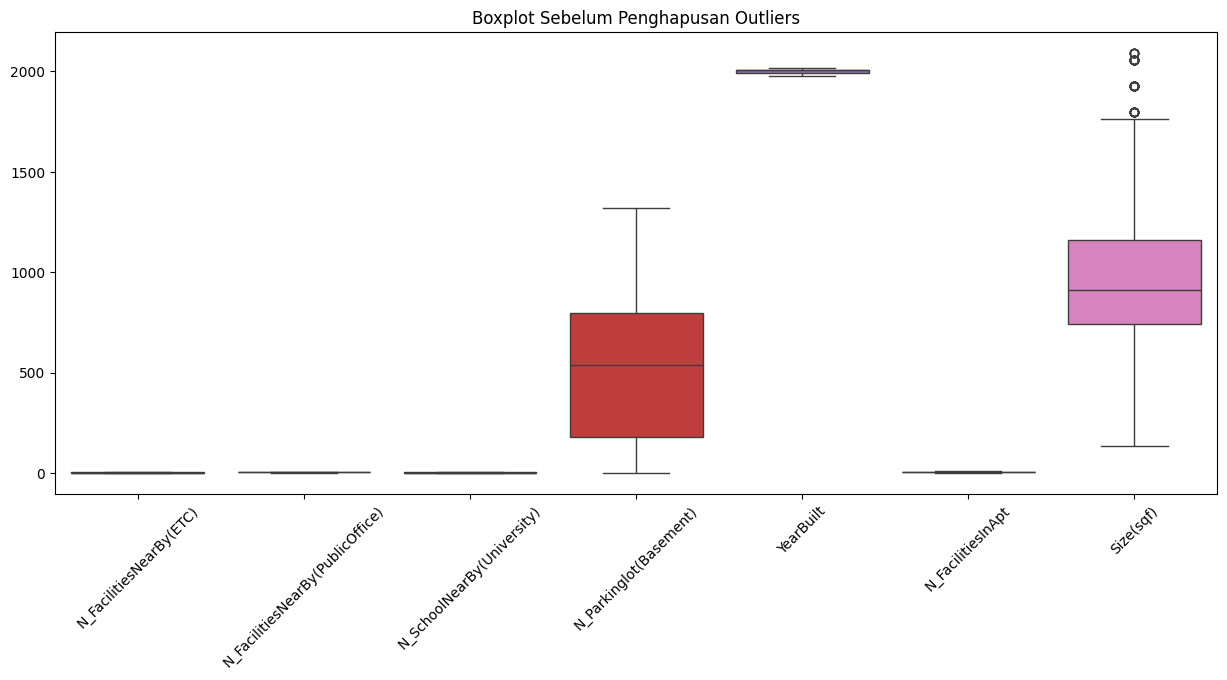

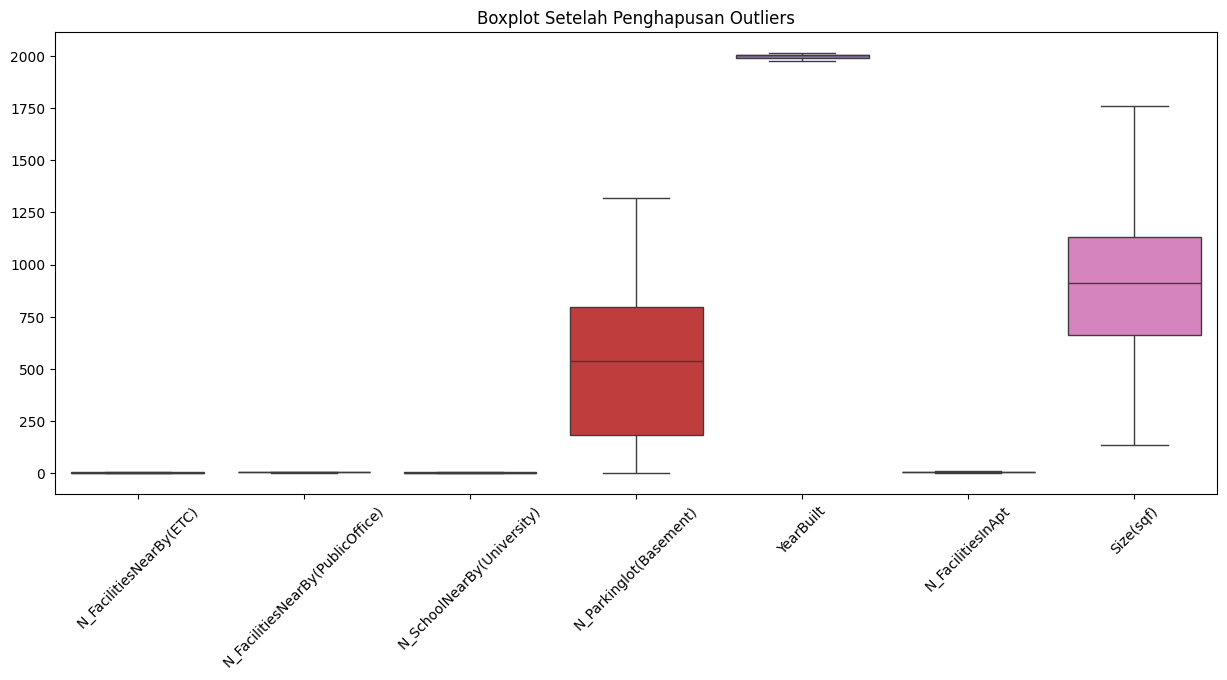

In [46]:
# Visualisasi boxplot sebelum penghapusan outliers
plt.figure(figsize=(15, 6))
sns.boxplot(data=X_train.select_dtypes(include='number'))
plt.title("Boxplot Sebelum Penghapusan Outliers")
plt.xticks(rotation=45)
plt.show()

# Visualisasi boxplot sesudah penghapusan outliers
plt.figure(figsize=(15, 6))
sns.boxplot(data=X_train_iqr.select_dtypes(include='number'))
plt.title("Boxplot Setelah Penghapusan Outliers")
plt.xticks(rotation=45)
plt.show()


In [47]:
# Model dictionary
models = {
    'Decision Tree': dt,
    'Random Forest': rf,
    'XGBoost': xgb
}

# Menyiapkan list untuk hasil
results = []

for model_name, model in models.items():
    print(f'Model: {model_name} sedang diproses...')

    # Membuat pipeline
    pipeline = Pipeline(steps=[
        ('prep', prep),
        ('model', model)
    ])

    # Cross-validation
    cv = KFold(n_splits=5, shuffle=True, random_state=42)

    # RMSE dan MAE dengan custom scoring
    rmse_scores = -1 * cross_val_score(
        pipeline,
        X_train_iqr,
        y_train_iqr,
        cv=cv,
        scoring='neg_root_mean_squared_error'
    )
    mae_scores = -1 * cross_val_score(
        pipeline,
        X_train_iqr,
        y_train_iqr,
        cv=cv,
        scoring='neg_mean_absolute_error'
    )

    # Menyimpan hasil
    results.append({
        'Model': model_name,
        'Mean RMSE': np.mean(rmse_scores),
        'Std RMSE': np.std(rmse_scores),
        'Mean MAE': np.mean(mae_scores),
        'Std MAE': np.std(mae_scores)
    })

# Membuat DataFrame hasil
result_df = pd.DataFrame(results)
result_df

Model: Decision Tree sedang diproses...
Model: Random Forest sedang diproses...
Model: XGBoost sedang diproses...


,Model,Mean RMSE,Std RMSE,Mean MAE,Std MAE
0,Decision Tree,45875.532613,1942.020709,36855.124464,1482.816274
1,Random Forest,45775.417096,1770.935694,36831.217587,1431.592303
2,XGBoost,45733.175681,1837.156462,36781.404333,1494.229698


Kesimpulan Hasil Evaluasi Model Setelah Menghapus Outliers menggunakan IQR

Berdasarkan hasil eksperimen setelah penghapusan outliers menggunakan metode IQR, Random Forest Regressor, XGBoost Regressor, dan Decision Tree Regressor memiliki performa terbaik.

XGBoost Regressor: Memiliki mean RMSE (45733.17) dan mean MAE (36781.40) terendah, menjadikannya model terbaik.
Random Forest Regressor: Performa mendekati XGBoost dengan mean RMSE (45775.41) dan mean MAE (36831.21), serta hasil yang konsisten (standar deviasi rendah).
Decision Tree Regressor: Memiliki performa yang sedikit lebih rendah dibandingkan dua model lainnya dengan mean RMSE (45875.53) dan mean MAE (36855.12).
Kesimpulan Akhir:
Setelah menghapus outliers, XGBoost Regressor adalah model terbaik, diikuti oleh Random Forest Regressor dan Decision Tree Regressor, yang juga menunjukkan hasil prediksi yang konsisten.

## Experiment 3: 3 Model terbaik dengan Menghapus outliers menggunakan isolated forest

In [48]:
# Import IsolationForest
from sklearn.ensemble import IsolationForest

# Mengambil hanya numerik saja
numerik = X_train.select_dtypes(include='number')

# Memprediksi mana yang outliers
iso = IsolationForest()
iso.fit(numerik)
numerik['outliers'] = iso.predict(numerik)  # -1 artinya outliers

# jumlah outliers nya menurut isolation forest
display(numerik['outliers'].value_counts())

# Menghapus outliers dari X_train
# Baris yang bukan outlier (yaitu yang memiliki nilai 1)
mask = numerik['outliers'] != -1
X_train_isolation_forest = X_train[mask]

# Jika Anda juga ingin menghapus y_train yang sesuai
y_train_isolation_forest = y_train[mask]

# Menampilkan hasil
print("Jumlah baris sebelum penghapusan outlier:", X_train.shape[0])
print("Jumlah baris setelah penghapusan outlier:", X_train_isolation_forest.shape[0])

outliers
 1    1147
-1     994
Name: count, dtype: int64

Jumlah baris sebelum penghapusan outlier: 2141
Jumlah baris setelah penghapusan outlier: 1147


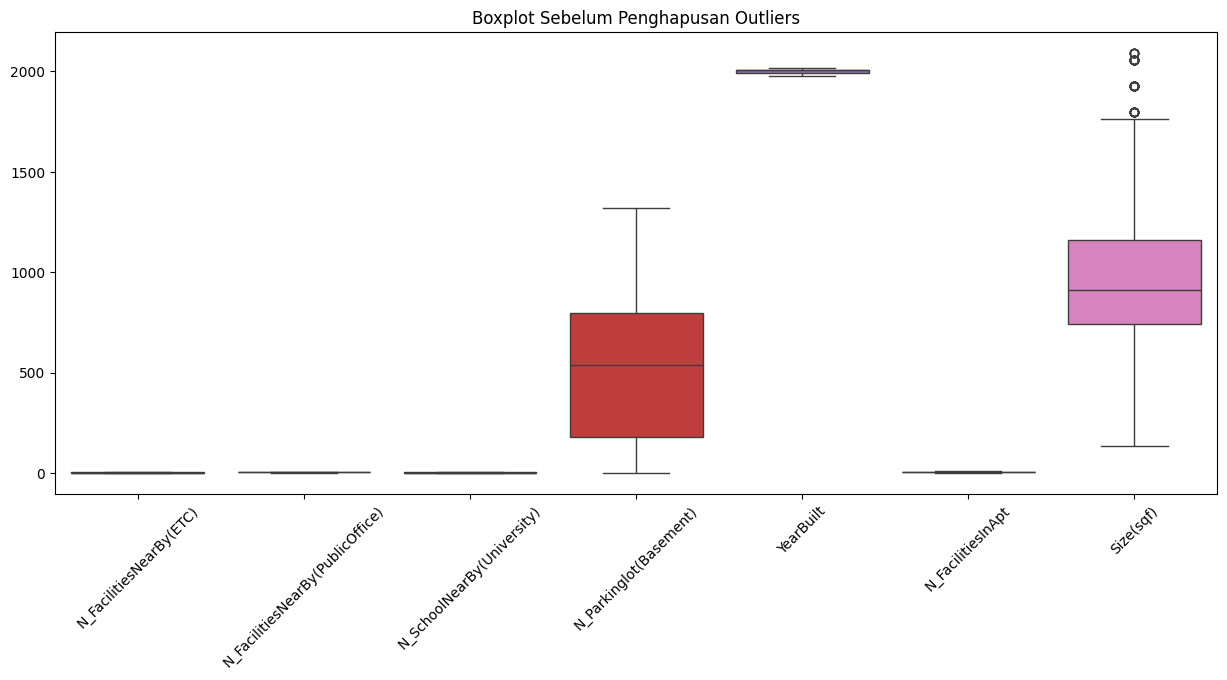

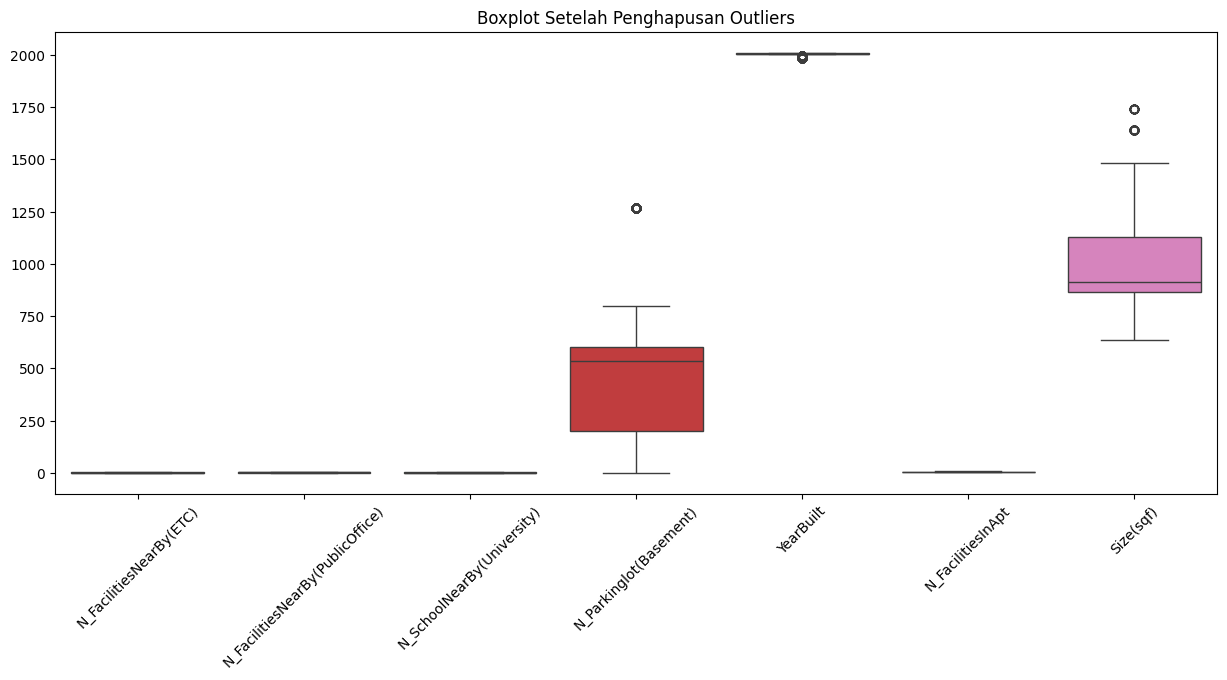

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi boxplot sebelum penghapusan outliers
plt.figure(figsize=(15, 6))
sns.boxplot(data=X_train.select_dtypes(include='number'))
plt.title("Boxplot Sebelum Penghapusan Outliers")
plt.xticks(rotation=45)
plt.show()

# Visualisasi boxplot sesudah penghapusan outliers
plt.figure(figsize=(15, 6))
sns.boxplot(data=X_train_isolation_forest.select_dtypes(include='number'))
plt.title("Boxplot Setelah Penghapusan Outliers")
plt.xticks(rotation=45)
plt.show()


In [50]:
# Model dictionary
models = {
    'Decision Tree': dt,
    'Random Forest': rf,
    'XGBoost': xgb
}

# Menyiapkan list untuk hasil
results = []

for model_name, model in models.items():
    print(f'Model: {model_name} sedang diproses...')

    # Membuat pipeline
    pipeline = Pipeline(steps=[
        ('prep', prep),
        ('model', model)
    ])

    # Cross-validation
    cv = KFold(n_splits=5, shuffle=True, random_state=42)

    # RMSE dan MAE dengan custom scoring
    rmse_scores = -1 * cross_val_score(
        pipeline,
        X_train_isolation_forest,
        y_train_isolation_forest,
        cv=cv,
        scoring='neg_root_mean_squared_error'
    )
    mae_scores = -1 * cross_val_score(
        pipeline,
        X_train_isolation_forest,
        y_train_isolation_forest,
        cv=cv,
        scoring='neg_mean_absolute_error'
    )

    # Menyimpan hasil
    results.append({
        'Model': model_name,
        'Mean RMSE': np.mean(rmse_scores),
        'Std RMSE': np.std(rmse_scores),
        'Mean MAE': np.mean(mae_scores),
        'Std MAE': np.std(mae_scores)
    })

# Membuat DataFrame hasil
result_df = pd.DataFrame(results)
result_df

Model: Decision Tree sedang diproses...
Model: Random Forest sedang diproses...
Model: XGBoost sedang diproses...


,Model,Mean RMSE,Std RMSE,Mean MAE,Std MAE
0,Decision Tree,49240.861595,1814.390770,41304.848118,1055.946300
1,Random Forest,49243.947479,1836.231675,41317.713966,1072.077338
2,XGBoost,49240.861346,1814.391491,41304.847295,1055.946820


## Final Model

In [51]:
# Benchmark best_model terbaik
best_models = {
    'XGBoost': xgb
}

score_rmse = []
score_mae = []

# Prediksi pada test set
for i in best_models:

    model = Pipeline([
        ('prep', prep),
        ('model', best_models[i])
        ])

    model.fit(X_train_iqr, y_train_iqr)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae}, index= best_models.keys())
score_before_tuning

,RMSE,MAE
XGBoost,46401.533468,37852.763482


## Hyperparameter Tunning

In [52]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth,
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [53]:
# Benchmark model dengan hyperparameter tuning
best_models = {
    'XGBoost': xgb
}

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('prep',prep),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb,
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval,
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error'],
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 42
)

In [54]:
# Fitting the training data to find the best parameters
random_xgb.fit(X_train_iqr, y_train_iqr)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one '
                                                                               'hot '
                                                                               'encoder',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['HallwayType']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['SubwayStation']),
                                                                              ('ordinal_encoder',
                                                                               OrdinalEncoder(),
                                                                               ['TimeToSubway']),
                                                                              ('robust '
                                                                               'scaler',
                                                                               RobustSca...
                                                             np.float64(0.46415888336127775),
                                                             np.float64(1.2915496650148828),
                                                             np.float64(3.593813663804626),
                                                             np.float64(10.0)],
                                        'model__subsample': [np.float64(0.2),
                                                             np.float64(0.3),
                                                             np.float64(0.4),
                                                             np.float64(0.5),
                                                             np.float64(0.6),
                                                             np.float64(0.7),
                                                             np.float64(0.8),
                                                             np.float64(0.9)]},
                   random_state=42, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error'])

In [55]:
# To view tuning result in dataframe. Shorted by R-square
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error
12,0.237482,0.010128,0.039228,0.005274,0.9,0.464159,162,2,0.71,7,...,1359.469354,1,-36656.681040,-38398.984610,-36199.758085,-36927.917988,-35697.404415,-36776.149227,912.887529,9
31,0.349718,0.068565,0.044713,0.007732,0.9,10.000000,176,3,0.48,3,...,1297.598929,2,-36843.087966,-38200.997023,-35829.911142,-36768.821910,-35643.428069,-36657.249222,910.215733,2
16,0.280018,0.027217,0.038215,0.005233,0.5,0.021544,183,3,0.27,5,...,1259.050951,3,-37334.346961,-38440.863262,-36249.317308,-36384.946686,-35531.662453,-36788.227334,1006.127900,10
9,0.252075,0.013515,0.038259,0.003127,0.9,0.059948,105,5,0.38,3,...,1394.296616,4,-36786.886738,-38221.623958,-36052.454421,-36766.860014,-35457.378097,-36657.040645,925.370842,1
37,0.386974,0.049562,0.054282,0.010321,0.9,0.166810,146,4,0.62,10,...,1347.166690,5,-36940.069543,-38324.101224,-36238.013362,-36560.995824,-35535.668816,-36719.769754,925.397739,4


In [56]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -45401.319561555
Best_params: {'model__subsample': np.float64(0.9), 'model__reg_alpha': np.float64(0.46415888336127775), 'model__n_estimators': np.int64(162), 'model__max_depth': np.int64(2), 'model__learning_rate': np.float64(0.71), 'model__gamma': np.int64(7), 'model__colsample_bytree': np.float64(0.8)}


In [57]:
# Model XGBoost
best_models = {
    'XGBoost': xgb
}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train_iqr, y_train_iqr)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning}, index=best_models.keys())
score_after_tuning

,RMSE,MAE
XGBoost,46261.437158,37723.986109


## Performance Comparison

Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.

In [58]:
# Sebelum hyperparameter tuning
score_before_tuning

,RMSE,MAE
XGBoost,46401.533468,37852.763482


In [59]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE
XGBoost,46261.437158,37723.986109


Model mengalami peningkatan performa (nilai RMSE, MAE berkurang) dengan dilakukannya hyperparameter tuning, walaupun hanya sedikit.
- RMSE, MAE sebelum tuning: 46401.533468, 37852.763482
- RMSE, MAE setelah tuning: 46261.437158, 37723.986109

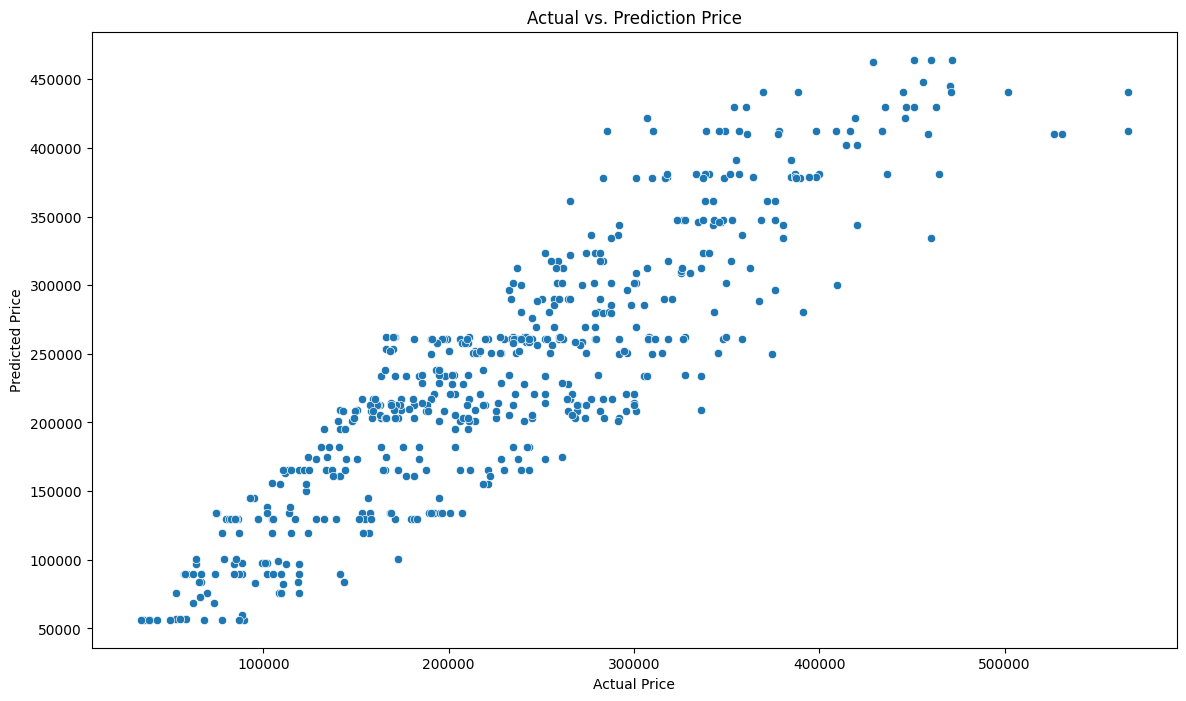

In [60]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price',
                                               xlabel='Actual Price',
                                               ylabel='Predicted Price')

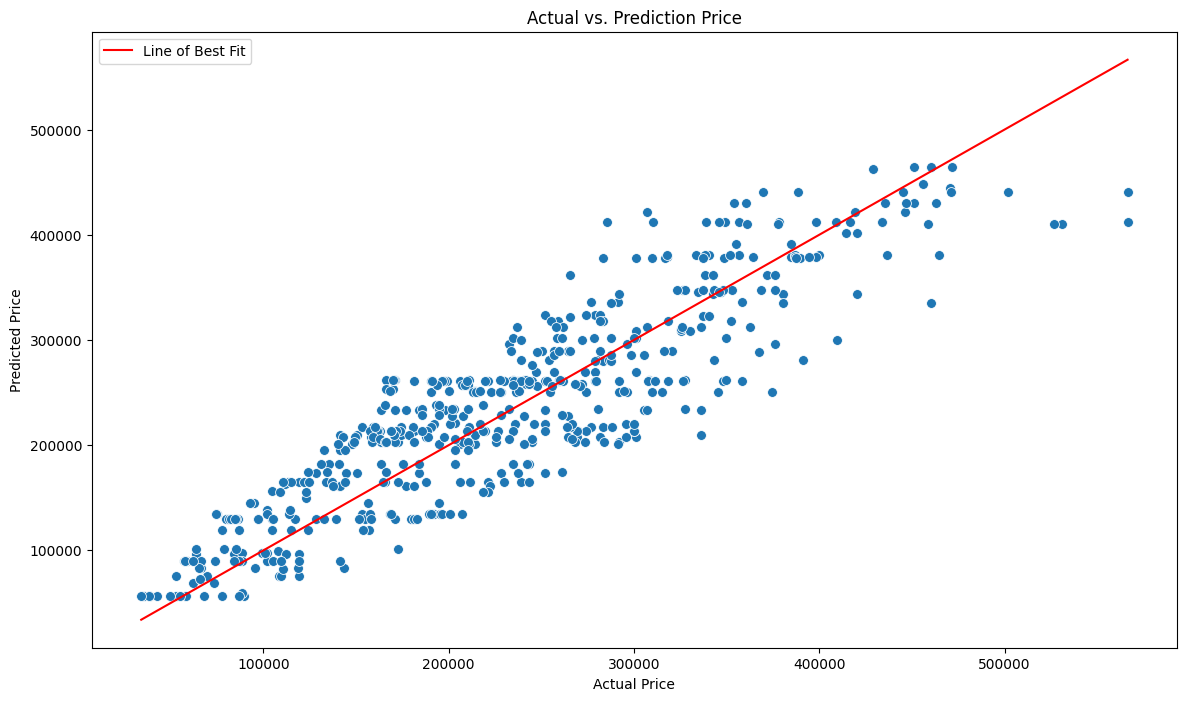

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14, 8))
sns.scatterplot(x=y_test, y=y_pred_xgb_tuning, s=50)
# Menambahkan garis linear
sns.lineplot(x=y_test, y=y_test, color='red', label='Line of Best Fit')
plt.title('Actual vs. Prediction Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()


# Final Model Interpretation

## Feature Importances

In [62]:
# Feature Importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, prep.get_feature_names_out()).sort_values(ascending = False)
feature_imp.to_frame(name='Feature Importances')

,Feature Importances
one hot encoder__HallwayType_terraced,0.860473
robust scaler__N_Parkinglot(Basement),0.057252
robust scaler__N_FacilitiesNearBy(ETC),0.026407
robust scaler__Size(sqf),0.019169
robust scaler__YearBuilt,0.014400
binary__SubwayStation_3,0.006557
robust scaler__N_SchoolNearBy(University),0.005569
robust scaler__N_FacilitiesInApt,0.002864
binary__SubwayStation_0,0.001919
binary__SubwayStation_2,0.001742


<Axes: title={'center': 'Feature Importances'}>

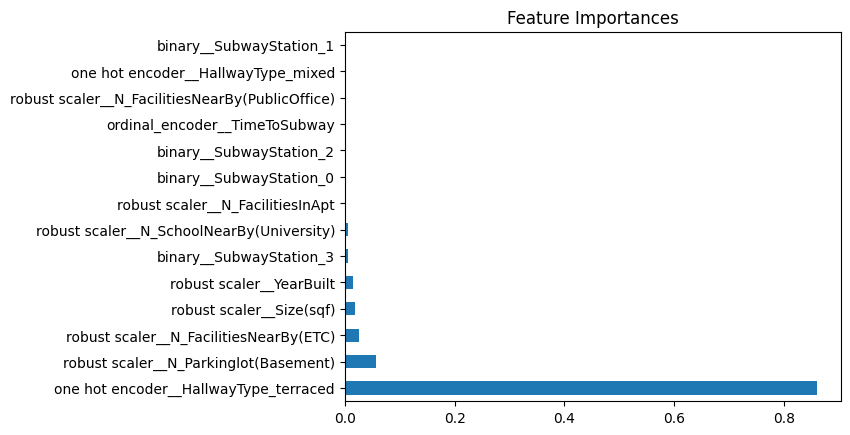

In [63]:
# Plot Feature Importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, prep.get_feature_names_out()).sort_values(ascending = False)
feature_imp.plot(kind='barh', title='Feature Importances')

Fitur Terpenting
one hot encoder__HallwayType_terraced memiliki nilai penting tertinggi (~0.86). Hal ini menunjukkan bahwa jenis lorong "terraced" sangat signifikan dalam memengaruhi variabel target (misalnya, harga properti). Fitur ini mungkin berhubungan dengan preferensi pasar atau kenyamanan desain bangunan tertentu.

Ukuran Parkir Basement
robust scaler__N_Parkinglot(Basement) memiliki nilai penting sebesar ~0.057. Hal ini menunjukkan bahwa jumlah tempat parkir di basement memiliki pengaruh sedang terhadap variabel target. Fitur ini menunjukkan pentingnya fasilitas parkir di area properti.

Keberadaan Fasilitas Terdekat
Fitur robust scaler__N_FacilitiesNearBy(ETC) dengan nilai ~0.026 menunjukkan bahwa keberadaan fasilitas lain di sekitar properti memberikan pengaruh kecil terhadap variabel target. Ini mencerminkan bahwa, meskipun penting, fitur ini tidak sekuat fitur lainnya seperti jenis lorong.

Ukuran Properti
robust scaler__Size(sqf) memiliki pengaruh sebesar ~0.019. Ukuran properti, meskipun menjadi salah satu elemen penting dalam pasar properti, ternyata memiliki pengaruh lebih kecil dibandingkan fitur lainnya di model ini.

Tahun Pembangunan
Fitur robust scaler__YearBuilt memiliki nilai sebesar ~0.014. Tahun pembangunan properti menunjukkan adanya pengaruh, tetapi relatif rendah. Mungkin, ini menunjukkan bahwa kondisi bangunan lebih penting daripada tahun pembangunannya.

# Estimasi Keuntungan
Hasil evaluasi menunjukkan bahwa model Rule-Based memiliki rata-rata kesalahan prediksi (MAE) sebesar ₩120,011, sedangkan model machine learning (XGBoost) hanya memiliki rata-rata kesalahan sebesar ₩37,853. Dengan perbedaan ini, penggunaan machine learning berhasil mengurangi kesalahan prediksi sebesar ₩82,158, yang merupakan penurunan sebesar 68.4% dibandingkan dengan model Rule-Based. Pengurangan signifikan dalam kesalahan prediksi ini memungkinkan perusahaan real estate memberikan rekomendasi harga apartemen yang lebih akurat dan berbasis data, sehingga membantu mempercepat proses penjualan dan memaksimalkan keuntungan pemilik properti.

# Kesimpulan

Berdasarkan hasil evaluasi model dan tuning, XGBoost merupakan model terbaik yang digunakan untuk memprediksi harga apartemen di Daegu. Sebelum dilakukan tuning, model XGBoost memiliki RMSE sebesar 46,401.53 dan MAE sebesar 37,852.76, sementara setelah tuning menggunakan RandomizedSearchCV, nilai RMSE turun menjadi 46,261.44 dan MAE menjadi 37,723.99. Meskipun perubahan tersebut tidak terlalu besar, hasil tuning menunjukkan bahwa model ini memberikan prediksi yang lebih akurat, dengan kesalahan yang lebih kecil dibandingkan sebelum tuning.

Berdasarkan model final yang dipilih, fitur yang paling berpengaruh terhadap harga apartemen di Daegu adalah tipe apartemen terraced, ukuran apartemen, dan jumlah tempat parkir basement. Dengan menggunakan model final ini, agen real estate dapat memberikan rekomendasi harga jual apartemen yang lebih tepat di Daegu, Korea Selatan, yang dapat meningkatkan tingkat kesuksesan dalam memasarkan dan menjual unit apartemen tersebut.

Sebelum adanya model regresi, hanya tersedia data mentah tentang karakteristik apartemen dan harga apartemen di Daegu yang sulit untuk diinterpretasikan dan tidak memberikan wawasan yang berguna terkait hubungan antara karakteristik apartemen dan harga apartemen. Namun, dengan adanya model XGBoost, kita dapat melakukan analisis yang lebih mendalam dan mendapatkan pemahaman yang lebih baik mengenai hubungan tersebut. Selain itu, model regresi ini juga dapat digunakan untuk memprediksi perubahan nilai harga apartemen jika karakteristik apartemen berubah. Dalam hal ini, dampak setelah adanya model regresi lebih besar dibandingkan sebelum penerapannya, karena agen real estate dapat membuat keputusan yang lebih tepat berdasarkan analisis model tersebut, seperti menentukan harga jual apartemen yang lebih sesuai dengan kondisi pasar.

Secara keseluruhan, penggunaan model machine learning seperti XGBoost memberikan keuntungan besar dengan mengurangi kesalahan prediksi hingga ₩82,158 per transaksi, atau sekitar 68.4% dibandingkan dengan model Rule-Based. Hal ini tidak hanya meningkatkan akurasi prediksi harga apartemen tetapi juga mempercepat proses penjualan dan mengoptimalkan keuntungan bagi pemilik properti.

# Recomendation

**Rekomendasi untuk Model**
1. Menambah Fitur yang Relevan:
    Berdasarkan hasil feature importances yang menunjukkan bahwa tipe apartemen terraced dan jumlah tempat parkir basement sangat berpengaruh terhadap harga, kami menyarankan untuk menambah lebih banyak fitur yang memiliki hubungan langsung dengan harga apartemen. Ini termasuk faktor-faktor seperti lantai apartemen, jumlah kamar tidur, jumlah kamar mandi, jumlah dapur, dan jumlah personel keamanan.
    Selain itu, seperti yang Anda sebutkan dalam rekomendasi, menambahkan faktor eksternal seperti indeks harga konsumen (IHK), produk domestik bruto (PDB), atau tingkat suku bunga juga dapat meningkatkan akurasi model. Hal ini karena faktor makroekonomi ini berpengaruh signifikan pada harga properti dan dapat memperkaya konteks prediksi.

2. Peningkatan Jumlah dan Kualitas Dataset:
    Untuk meningkatkan akurasi dan relevansi model, sangat penting untuk memperbesar dan meningkatkan kualitas dataset. Dengan menambah lebih banyak data, terutama yang lebih terperinci tentang karakteristik apartemen, lokasi, dan kondisi pasar, kita bisa mendapatkan pemahaman yang lebih baik tentang pola yang ada. Ini akan membantu model untuk lebih baik dalam memprediksi harga apartemen di Daegu berdasarkan variabel yang lebih lengkap.
    Selain itu, model dapat berkembang lebih baik jika menggunakan data historis dan tren pasar terkini yang berkaitan dengan harga jual atau transaksi apartemen, baik yang terkait dengan kondisi properti itu sendiri maupun faktor eksternal yang mempengaruhi pasar properti di Daegu.

3. Penggunaan Model yang Lebih Kompleks:
    Meskipun model XGBoost memberikan hasil yang cukup baik, ada peluang untuk mengeksplorasi model yang lebih kompleks, seperti Recurrent Neural Networks (RNN) jika dataset memiliki elemen waktu yang signifikan. RNN dapat digunakan untuk memodelkan perubahan harga apartemen dari waktu ke waktu atau fluktuasi harga musiman, meskipun penggunaan model yang lebih kompleks dapat membuat interpretasi lebih sulit. Hal ini harus diimbangi dengan pemahaman yang lebih mendalam tentang data dan bagaimana elemen waktu dapat mempengaruhi harga apartemen di pasar lokal.

**Rekomendasi untuk Bisnis**
1. Fokus pada Tipe Apartemen Terraced dan Ukuran Apartemen:
    Berdasarkan feature importances, tipe apartemen terraced dan ukuran apartemen adalah dua faktor utama yang mempengaruhi harga jual apartemen di Daegu. Oleh karena itu, perusahaan real estate sebaiknya menekankan keunggulan apartemen terraced dalam pemasaran dan penjualan mereka. Fitur ini memiliki kontribusi terbesar terhadap harga jual apartemen, yang berarti pemilik properti atau agen real estate dapat fokus pada mempromosikan kelebihan ruang dan privasi yang ditawarkan oleh apartemen dengan tipe ini.

2. Peningkatan Fasilitas Parkir dan Keamanan:
    Fasilitas parkir, terutama tempat parkir basement, menunjukkan kontribusi yang signifikan terhadap harga apartemen. Untuk meningkatkan penjualan apartemen, agen real estate sebaiknya memperhatikan fitur ini dan menonjolkan apartemen yang menawarkan tempat parkir basement sebagai keunggulan. Selain itu, fitur keamanan, seperti jumlah personel keamanan atau sistem keamanan, bisa menjadi nilai tambah yang menarik bagi calon pembeli. Ini adalah salah satu nilai jual utama yang dapat meningkatkan harga jual apartemen.

3. Aksesibilitas ke Transportasi dan Fasilitas Umum:
    Akses ke transportasi umum, seperti kedekatan dengan stasiun subway, tetap menjadi faktor penting meskipun kontribusinya lebih rendah dibandingkan faktor lainnya. Sebagai rekomendasi bisnis, agen dapat meningkatkan fokus pada lokasi apartemen yang dekat dengan stasiun subway atau fasilitas umum seperti sekolah, universitas, atau kantor publik. Ini sangat penting bagi calon pembeli yang menginginkan kemudahan akses ke transportasi umum dan fasilitas umum di sekitar apartemen mereka.

4. Penyempurnaan Fitur Eksternal dalam Strategi Pemasaran:
Mengingat faktor eksternal seperti tingkat suku bunga dan kinerja ekonomi dapat memengaruhi harga apartemen, perusahaan real estate dapat mempertimbangkan untuk mengintegrasikan faktor-faktor makroekonomi ini ke dalam strategi pemasaran mereka. Dengan mempromosikan pengetahuan tentang kondisi pasar terkini dan dampak dari perubahan ekonomi, mereka bisa memberikan panduan yang lebih baik kepada pembeli tentang kondisi harga apartemen yang sedang berlaku. Ini dapat memberikan rasa percaya diri lebih kepada pembeli dan membantu mereka dalam membuat keputusan yang lebih informasional. 

## Save Model

In [64]:
# Save model
import pickle

final_model = Pipeline([('prep', prep), ('model', XGBRegressor())])
final_model.fit(X_train_iqr, y_train_iqr)

pickle.dump(final_model, open('Daegu_Apartment_XGB.sav', 'wb'))
# Load model

In [65]:
# Load model
filename = 'Daegu_Apartment_XGB.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [66]:
# model sudah bisa untuk prediksi
loaded_model.predict(X)

array([377761.1  , 171369.36 ,  83818.625, ..., 260937.6  , 207942.31 ,
        72921.03 ], dtype=float32)